In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import math
import scipy.stats as scs
from pylab import mpl, plt
import numpy.random as npr
plt.style.use('dark_background')
mpl.rcParams['font.family'] = 'serif'
%config InlineBackend.figure_format = 'svg'
import sys
sys.path.append('../dx')

RANDOM NUMBERS

In [2]:
npr.seed(100)  
np.set_printoptions(precision=4) 

In [3]:
npr.rand(10)  

array([0.5434, 0.2784, 0.4245, 0.8448, 0.0047, 0.1216, 0.6707, 0.8259,
       0.1367, 0.5751])

In [4]:
npr.rand(5, 5)  

array([[0.8913, 0.2092, 0.1853, 0.1084, 0.2197],
       [0.9786, 0.8117, 0.1719, 0.8162, 0.2741],
       [0.4317, 0.94  , 0.8176, 0.3361, 0.1754],
       [0.3728, 0.0057, 0.2524, 0.7957, 0.0153],
       [0.5988, 0.6038, 0.1051, 0.3819, 0.0365]])

In [5]:
a = 5.  
b = 10.  
npr.rand(10) * (b - a) + a  

array([9.4521, 9.9046, 5.2997, 9.4527, 7.8845, 8.7124, 8.1509, 7.9092,
       5.1022, 6.0501])

In [6]:
npr.rand(5, 5) * (b - a) + a  

array([[7.7234, 8.8456, 6.2535, 6.4295, 9.262 ],
       [9.875 , 9.4243, 6.7975, 7.9943, 6.774 ],
       [6.701 , 5.8904, 6.1885, 5.2243, 7.5272],
       [6.8813, 7.964 , 8.1497, 5.713 , 9.6692],
       [9.7319, 8.0115, 6.9388, 6.8159, 6.0217]])

In [7]:
sample_size = 500
rn1 = npr.rand(sample_size, 3)  
rn2 = npr.randint(0, 10, sample_size)  
rn3 = npr.sample(size=sample_size)  
a = [0, 25, 50, 75, 100]  
rn4 = npr.choice(a, size=sample_size) 

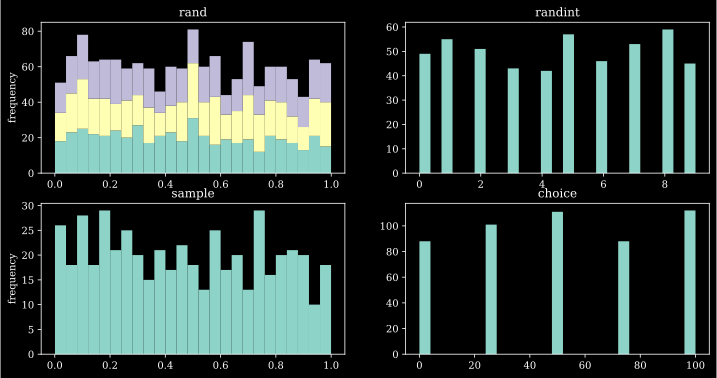

In [8]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2,
                                             figsize=(12, 6))
ax1.hist(rn1, bins=25, stacked=True)
ax1.set_title('rand')
ax1.set_ylabel('frequency')
ax2.hist(rn2, bins=25)
ax2.set_title('randint')
ax3.hist(rn3, bins=25)
ax3.set_title('sample')
ax3.set_ylabel('frequency')
ax4.hist(rn4, bins=25)
ax4.set_title('choice');

In [9]:
sample_size = 500
rn1 = npr.standard_normal(sample_size)  
rn2 = npr.normal(100, 20, sample_size)  
rn3 = npr.chisquare(df=0.5, size=sample_size)  
rn4 = npr.poisson(lam=1.0, size=sample_size)  

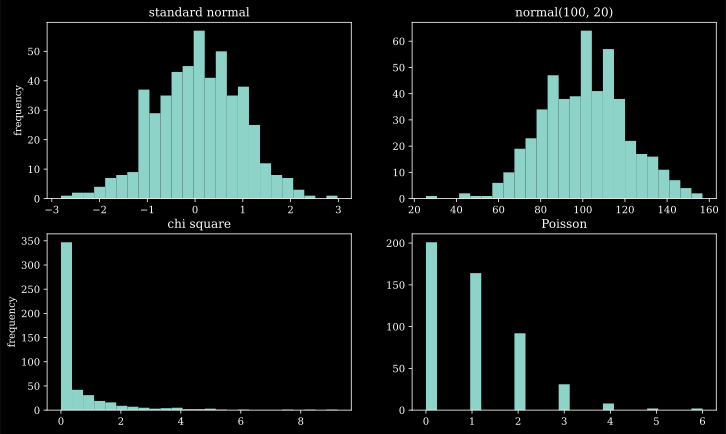

In [10]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2,
                                             figsize=(12, 7))
ax1.hist(rn1, bins=25)
ax1.set_title('standard normal')
ax1.set_ylabel('frequency')
ax2.hist(rn2, bins=25)
ax2.set_title('normal(100, 20)')
ax3.hist(rn3, bins=25)
ax3.set_title('chi square')
ax3.set_ylabel('frequency')
ax4.hist(rn4, bins=25)
ax4.set_title('Poisson');

Simulation
Random Variables

In [11]:
S0 = 100  
r = 0.05  
sigma = 0.25  
T = 2.0  
I = 10000  
ST1 = S0 * np.exp((r - 0.5 * sigma ** 2) * T +
        sigma * math.sqrt(T) * npr.standard_normal(I))  

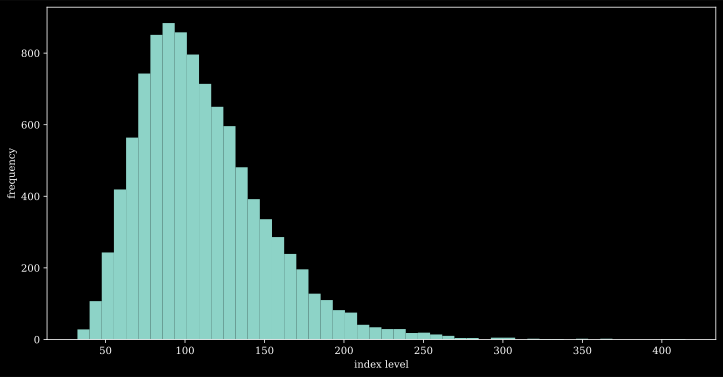

In [12]:
plt.figure(figsize=(12, 6))
plt.hist(ST1, bins=50)
plt.xlabel('index level')
plt.ylabel('frequency');

In [13]:
ST2 = S0 * npr.lognormal((r - 0.5 * sigma ** 2) * T,
                        sigma * math.sqrt(T), size=I)  

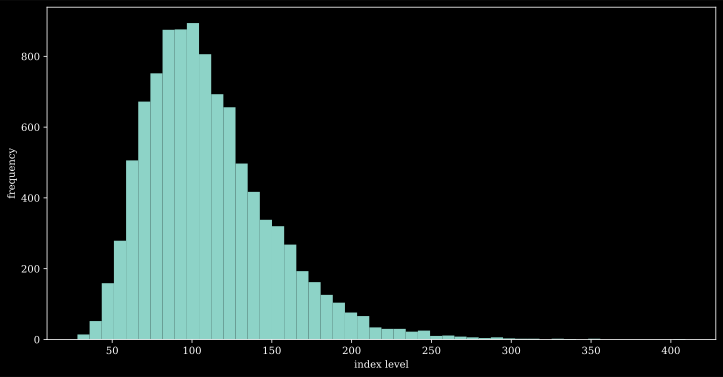

In [14]:
plt.figure(figsize=(12, 6))
plt.hist(ST2, bins=50)
plt.xlabel('index level')
plt.ylabel('frequency');

In [15]:
def print_statistics(a1, a2):
    ''' Prints selected statistics.
    
    Parameters
    ==========
    a1, a2: ndarray objects
        results objects from simulation
    '''
    sta1 = scs.describe(a1)  
    sta2 = scs.describe(a2)  
    print('%14s %14s %14s' % 
        ('statistic', 'data set 1', 'data set 2'))
    print(45 * "-")
    print('%14s %14.3f %14.3f' % ('size', sta1[0], sta2[0]))
    print('%14s %14.3f %14.3f' % ('min', sta1[1][0], sta2[1][0]))
    print('%14s %14.3f %14.3f' % ('max', sta1[1][1], sta2[1][1]))
    print('%14s %14.3f %14.3f' % ('mean', sta1[2], sta2[2]))
    print('%14s %14.3f %14.3f' % ('std', np.sqrt(sta1[3]), np.sqrt(sta2[3])))
    print('%14s %14.3f %14.3f' % ('skew', sta1[4], sta2[4]))
    print('%14s %14.3f %14.3f' % ('kurtosis', sta1[5], sta2[5]))

In [16]:
print_statistics(ST1, ST2)

     statistic     data set 1     data set 2
---------------------------------------------
          size      10000.000      10000.000
           min         32.327         28.230
           max        414.825        409.110
          mean        110.730        110.431
           std         40.300         39.878
          skew          1.122          1.115
      kurtosis          2.438          2.217


Stochastic Processes
Geometric Brownian Motion

In [17]:
I = 10000  
M = 50  
dt = T / M  
S = np.zeros((M + 1, I))  
S[0] = S0  
for t in range(1, M + 1):
    S[t] = S[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt +
            sigma * math.sqrt(dt) * npr.standard_normal(I))  

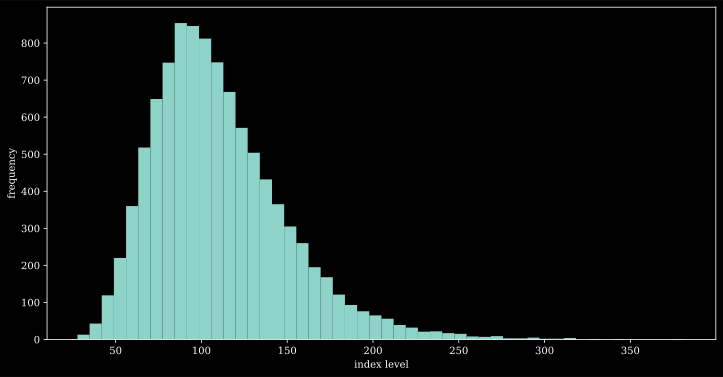

In [18]:
plt.figure(figsize=(12, 6))
plt.hist(S[-1], bins=50)
plt.xlabel('index level')
plt.ylabel('frequency');

In [19]:
print_statistics(S[-1], ST2)

     statistic     data set 1     data set 2
---------------------------------------------
          size      10000.000      10000.000
           min         27.746         28.230
           max        382.096        409.110
          mean        110.423        110.431
           std         39.179         39.878
          skew          1.069          1.115
      kurtosis          2.028          2.217


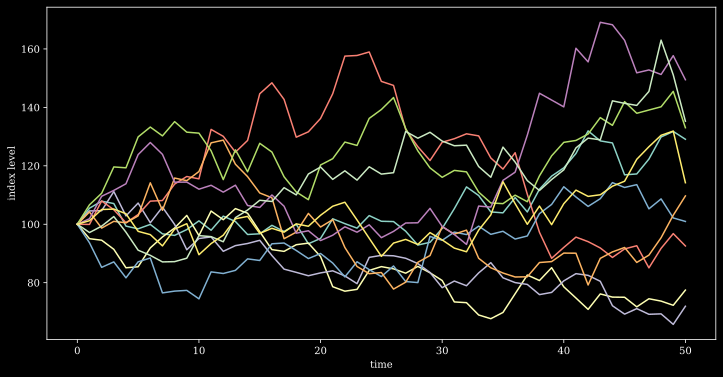

In [20]:
plt.figure(figsize=(12, 6))
plt.plot(S[:, :10], lw=1.5)
plt.xlabel('time')
plt.ylabel('index level');

Square-Root Diffusion

In [21]:
x0 = 0.05  
kappa = 3.0  
theta = 0.02  
sigma = 0.1  
I = 10000
M = 50
dt = T / M

In [22]:
def srd_euler():
    xh = np.zeros((M + 1, I))
    x = np.zeros_like(xh)
    xh[0] = x0
    x[0] = x0
    for t in range(1, M + 1):
        xh[t] = (xh[t - 1] +
                 kappa * (theta - np.maximum(xh[t - 1], 0)) * dt +
                 sigma * np.sqrt(np.maximum(xh[t - 1], 0)) *
                 math.sqrt(dt) * npr.standard_normal(I))  
    x = np.maximum(xh, 0)
    return x
x1 = srd_euler()

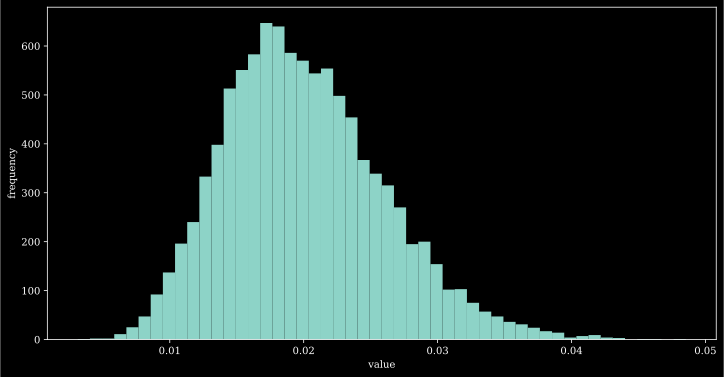

In [23]:
plt.figure(figsize=(12, 6))
plt.hist(x1[-1], bins=50)
plt.xlabel('value')
plt.ylabel('frequency');

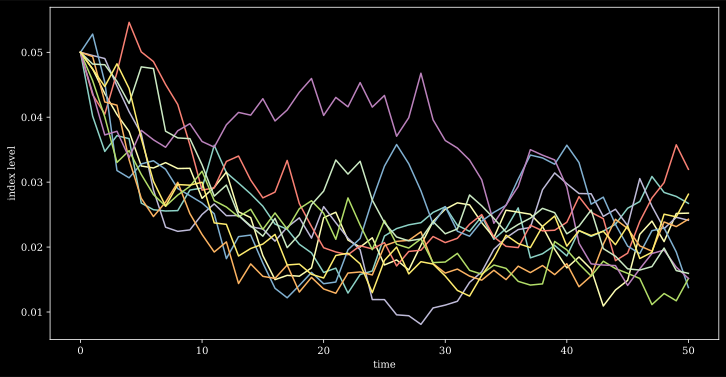

In [24]:
plt.figure(figsize=(12, 6))
plt.plot(x1[:, :10], lw=1.5)
plt.xlabel('time')
plt.ylabel('index level');

In [25]:
def srd_exact():
    x = np.zeros((M + 1, I))
    x[0] = x0
    for t in range(1, M + 1):
        df = 4 * theta * kappa / sigma ** 2  
        c = (sigma ** 2 * (1 - np.exp(-kappa * dt))) / (4 * kappa)  
        nc = np.exp(-kappa * dt) / c * x[t - 1]  
        x[t] = c * npr.noncentral_chisquare(df, nc, size=I)  
    return x
x2 = srd_exact()

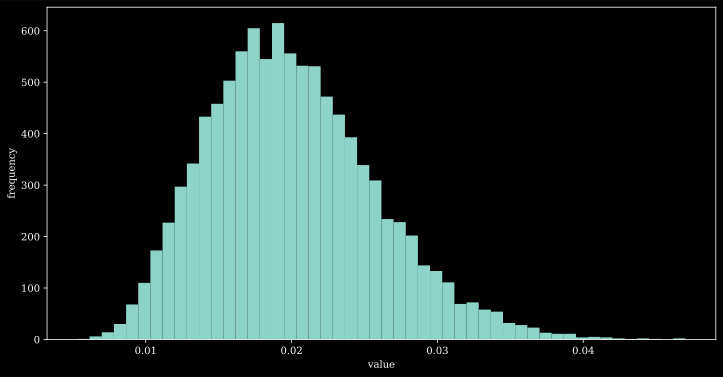

In [26]:
plt.figure(figsize=(12, 6))
plt.hist(x2[-1], bins=50)
plt.xlabel('value')
plt.ylabel('frequency');

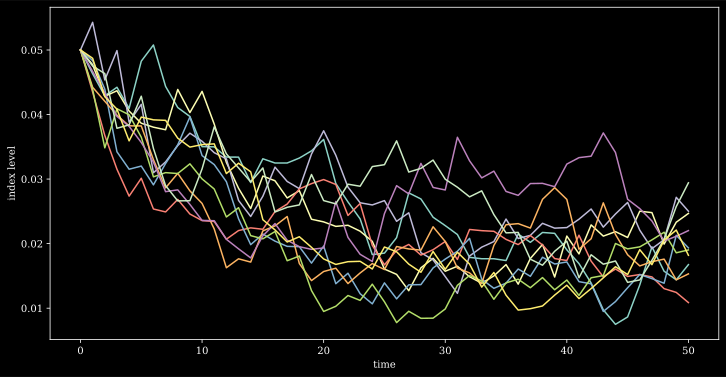

In [27]:
plt.figure(figsize=(12, 6))
plt.plot(x2[:, :10], lw=1.5)
plt.xlabel('time')
plt.ylabel('index level');

In [28]:
print_statistics(x1[-1], x2[-1])

     statistic     data set 1     data set 2
---------------------------------------------
          size      10000.000      10000.000
           min          0.003          0.005
           max          0.049          0.047
          mean          0.020          0.020
           std          0.006          0.006
          skew          0.529          0.532
      kurtosis          0.289          0.273


In [29]:
I = 250000
%time x1 = srd_euler()

CPU times: total: 78.1 ms
Wall time: 817 ms


In [30]:
%time x2 = srd_exact()

CPU times: total: 15.6 ms
Wall time: 815 ms


In [31]:
print_statistics(x1[-1], x2[-1])
x1 = 0.0; x2 = 0.0

     statistic     data set 1     data set 2
---------------------------------------------
          size     250000.000     250000.000
           min          0.002          0.003
           max          0.071          0.055
          mean          0.020          0.020
           std          0.006          0.006
          skew          0.563          0.579
      kurtosis          0.492          0.520


Stochastic Volatility

In [32]:
S0 = 100.
r = 0.05
v0 = 0.1  
kappa = 3.0
theta = 0.25
sigma = 0.1
rho = 0.6  
T = 1.0

In [33]:
corr_mat = np.zeros((2, 2))
corr_mat[0, :] = [1.0, rho]
corr_mat[1, :] = [rho, 1.0]
cho_mat = np.linalg.cholesky(corr_mat)  

In [34]:
cho_mat  

array([[1. , 0. ],
       [0.6, 0.8]])

In [35]:
M = 50
I = 10000
dt = T / M

In [36]:
ran_num = npr.standard_normal((2, M + 1, I))  

In [37]:
v = np.zeros_like(ran_num[0])
vh = np.zeros_like(v)

In [38]:
v[0] = v0
vh[0] = v0

In [39]:
for t in range(1, M + 1):
    ran = np.dot(cho_mat, ran_num[:, t, :])  
    vh[t] = (vh[t - 1] +
             kappa * (theta - np.maximum(vh[t - 1], 0)) * dt +
             sigma * np.sqrt(np.maximum(vh[t - 1], 0)) * 
             math.sqrt(dt) * ran[1])  

In [40]:
v = np.maximum(vh, 0)

In [41]:
S = np.zeros_like(ran_num[0])
S[0] = S0
for t in range(1, M + 1):
    ran = np.dot(cho_mat, ran_num[:, t, :])
    S[t] = S[t - 1] * np.exp((r - 0.5 * v[t]) * dt +
                    np.sqrt(v[t]) * ran[0] * np.sqrt(dt))

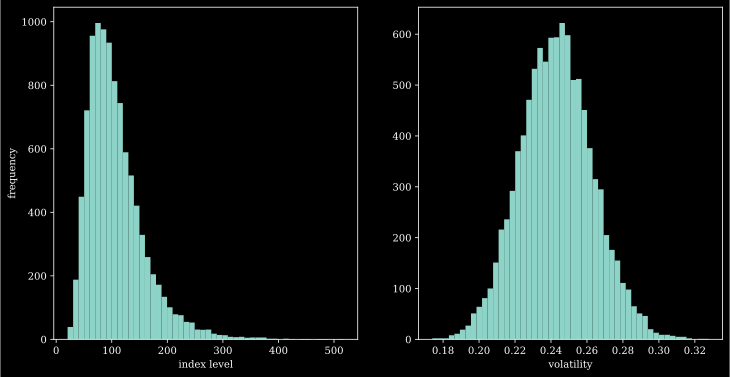

In [42]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.hist(S[-1], bins=50)
ax1.set_xlabel('index level')
ax1.set_ylabel('frequency')
ax2.hist(v[-1], bins=50)
ax2.set_xlabel('volatility');

In [43]:
print_statistics(S[-1], v[-1])

     statistic     data set 1     data set 2
---------------------------------------------
          size      10000.000      10000.000
           min         20.556          0.174
           max        517.798          0.328
          mean        107.843          0.243
           std         51.341          0.020
          skew          1.577          0.124
      kurtosis          4.306          0.048


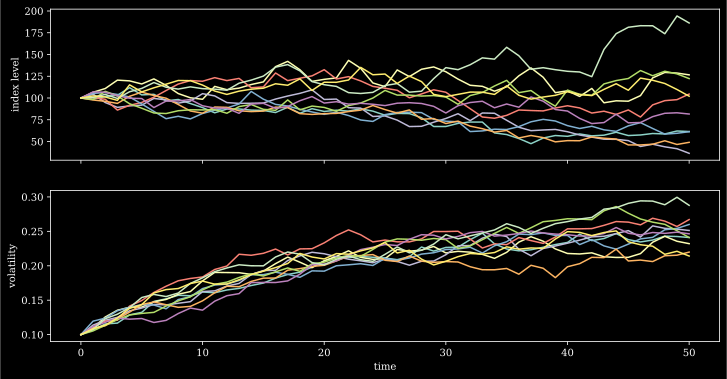

In [44]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12, 6))
ax1.plot(S[:, :10], lw=1.5)
ax1.set_ylabel('index level')
ax2.plot(v[:, :10], lw=1.5)
ax2.set_xlabel('time')
ax2.set_ylabel('volatility');

Jump-Diffusion

In [45]:
S0 = 100.
r = 0.05
sigma = 0.2
lamb = 0.75  
mu = -0.6  
delta = 0.25  
rj = lamb * (math.exp(mu + 0.5 * delta ** 2) - 1)  

In [46]:
T = 1.0
M = 50
I = 10000
dt = T / M

In [47]:
S = np.zeros((M + 1, I))
S[0] = S0
sn1 = npr.standard_normal((M + 1, I))  
sn2 = npr.standard_normal((M + 1, I))  
poi = npr.poisson(lamb * dt, (M + 1, I))  
for t in range(1, M + 1, 1):
    S[t] = S[t - 1] * (np.exp((r - rj - 0.5 * sigma ** 2) * dt +
                       sigma * math.sqrt(dt) * sn1[t]) +
                       (np.exp(mu + delta * sn2[t]) - 1) *
                       poi[t])  
    S[t] = np.maximum(S[t], 0)

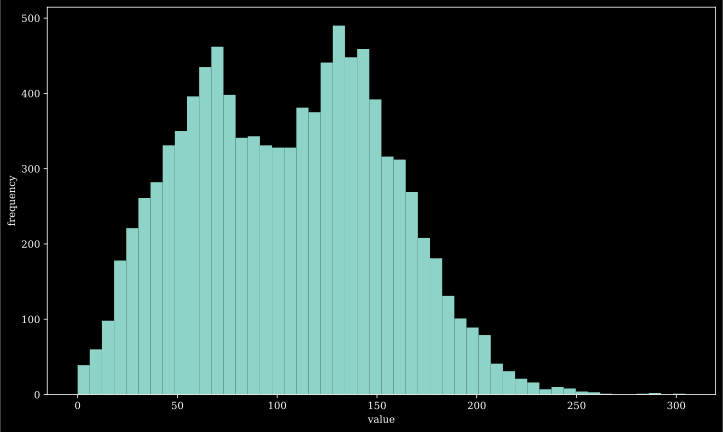

In [48]:
plt.figure(figsize=(12, 6))
plt.hist(S[-1], bins=50)
plt.xlabel('value')
plt.ylabel('frequency');

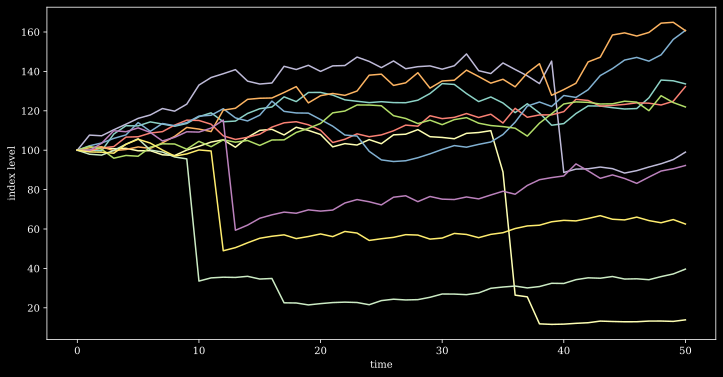

In [49]:
plt.figure(figsize=(12, 6))
plt.plot(S[:, :10], lw=1.5)
plt.xlabel('time')
plt.ylabel('index level');

Variance Reduction

In [50]:
print('%15s %15s' % ('Mean', 'Std. Deviation'))
print(31 * '-')
for i in range(1, 31, 2):
    npr.seed(100)
    sn = npr.standard_normal(i ** 2 * 10000)
    print('%15.12f %15.12f' % (sn.mean(), sn.std()))

           Mean  Std. Deviation
-------------------------------
 0.001150944833  1.006296354600
 0.002841204001  0.995987967146
 0.001998082016  0.997701714233
 0.001322322067  0.997771186968
 0.000592711311  0.998388962646
-0.000339730751  0.998399891450
-0.000228109010  0.998657429396
 0.000295768719  0.998877333340
 0.000257107789  0.999284894532
-0.000357870642  0.999456401088
-0.000528443742  0.999617831131
-0.000300171536  0.999445228838
-0.000162924037  0.999516059328
 0.000135778889  0.999611052522
 0.000182006048  0.999619405229


In [51]:
i ** 2 * 10000

8410000

In [52]:
sn = npr.standard_normal(int(10000 / 2))
sn = np.concatenate((sn, -sn))  

In [53]:
np.shape(sn)  

(10000,)

In [54]:
sn.mean()  

2.842170943040401e-18

In [55]:
print('%15s %15s' % ('Mean', 'Std. Deviation'))
print(31 * "-")
for i in range(1, 31, 2):
    npr.seed(1000)
    sn = npr.standard_normal(i ** 2 * int(10000 / 2))
    sn = np.concatenate((sn, -sn))
    print("%15.12f %15.12f" % (sn.mean(), sn.std()))

           Mean  Std. Deviation
-------------------------------
 0.000000000000  1.009653753942
-0.000000000000  1.000413716783
 0.000000000000  1.002925061201
-0.000000000000  1.000755212673
 0.000000000000  1.001636910076
-0.000000000000  1.000726758438
-0.000000000000  1.001621265149


 0.000000000000  1.001203722778
-0.000000000000  1.000556669784
 0.000000000000  1.000113464185
-0.000000000000  0.999435175324
 0.000000000000  0.999356961431
-0.000000000000  0.999641436845
-0.000000000000  0.999642768905
-0.000000000000  0.999638303451


In [56]:
sn = npr.standard_normal(10000)

In [57]:
sn.mean()

-0.001165998295162494

In [58]:
sn.std()

0.991255920204605

In [59]:
sn_new = (sn - sn.mean()) / sn.std()  

In [60]:
sn_new.mean()

-2.3803181647963357e-17

In [61]:
sn_new.std()

0.9999999999999999

In [62]:
def gen_sn(M, I, anti_paths=True, mo_match=True):
    ''' Function to generate random numbers for simulation.
    
    Parameters
    ==========
    M: int
        number of time intervals for discretization
    I: int
        number of paths to be simulated
    anti_paths: boolean
        use of antithetic variates
    mo_math: boolean
        use of moment matching
    '''
    if anti_paths is True:
        sn = npr.standard_normal((M + 1, int(I / 2)))
        sn = np.concatenate((sn, -sn), axis=1)
    else:
        sn = npr.standard_normal((M + 1, I))
    if mo_match is True:
        sn = (sn - sn.mean()) / sn.std()
    return sn

Valuation
European Options

In [63]:
S0 = 100.
r = 0.05
sigma = 0.25
T = 1.0
I = 50000

In [64]:
def gbm_mcs_stat(K):
    ''' Valuation of European call option in Black-Scholes-Merton
    by Monte Carlo simulation (of index level at maturity)
    
    Parameters
    ==========
    K: float
        (positive) strike price of the option
    
    Returns
    =======
    C0: float
        estimated present value of European call option
    '''
    sn = gen_sn(1, I)
    # simulate index level at maturity
    ST = S0 * np.exp((r - 0.5 * sigma ** 2) * T 
                 + sigma * math.sqrt(T) * sn[1])
    # calculate payoff at maturity
    hT = np.maximum(ST - K, 0)
    # calculate MCS estimator
    C0 = math.exp(-r * T) * np.mean(hT)
    return C0

In [65]:
gbm_mcs_stat(K=105.)  

10.044221852841922

In [66]:
M = 50  

In [67]:
def gbm_mcs_dyna(K, option='call'):
    ''' Valuation of European options in Black-Scholes-Merton
    by Monte Carlo simulation (of index level paths)
    
    Parameters
    ==========
    K: float
        (positive) strike price of the option
    option : string
        type of the option to be valued ('call', 'put')
    
    Returns
    =======
    C0: float
        estimated present value of European call option
    '''
    dt = T / M
    # simulation of index level paths
    S = np.zeros((M + 1, I))
    S[0] = S0
    sn = gen_sn(M, I)
    for t in range(1, M + 1):
        S[t] = S[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt 
                + sigma * math.sqrt(dt) * sn[t])
    # case-based calculation of payoff
    if option == 'call':
        hT = np.maximum(S[-1] - K, 0)
    else:
        hT = np.maximum(K - S[-1], 0)
    # calculation of MCS estimator
    C0 = math.exp(-r * T) * np.mean(hT)
    return C0

In [68]:
gbm_mcs_dyna(K=110., option='call')  

7.950008525028434

In [69]:
gbm_mcs_dyna(K=110., option='put')  

12.629934942682004

BLACK SCHOLES MERTON

In [70]:
from math import log, sqrt, exp
from scipy import stats

In [71]:
#Parameters

S0: float
#initial stock/index level
K: float
T: float
#maturity date (in year fractions)
r: float
#constant risk-free short rate
sigma: float
#volatility

#Returns

value: float
#present value of the European call option

In [72]:
def bsm_call_value(S0, K, T, r, sigma):
    S0 = float(S0)
    d1 = (log(S0 / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * sqrt(T))
    d2 = (log(S0 / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * sqrt(T))
    # stats.norm.cdf --> cumulative distribution function
    # for normal distribution
    value = (S0 * stats.norm.cdf(d1, 0.0, 1.0) -
    K * exp(-r * T) * stats.norm.cdf(d2, 0.0, 1.0))
    return value
    

In [73]:
def bsm_vega(S0, K, T, r, sigma):
    S0: float
    #initial stock/index level
    K: float
    #strike price
    T: float
    #maturity date (in year fractions)
    r: float
    #constant risk-free short rate
    sigma: float
    #volatility factor in diffusion term
    #Returns
    vega: float
    #partial derivative of BSM formula with respect to
    sigma
    S0 = float(S0)
    d1 = (log(S0 / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * sqrt(T))
    vega = S0 * stats.norm.pdf(d1, 0.0, 1.0) * sqrt(T)
    return vega
    

In [74]:
def bsm_call_imp_vol(S0, K, T, r, C0, sigma_est, it=100):
    
    #Implied volatility of European call option in BSM model.
    #Parameters

    S0: float
    #initial stock/index level
    K: float
    #strike price
    T: float
    #maturity date (in year fractions)
    r: float
    #constant risk-free short rate
    sigma_est: float
    #estimate of impl. volatility
    it: int
    #number of iterations
    #Returns
    sigma_est: float
    #numerically estimated implied volatility

    for i in range(it):
        sigma_est -= ((bsm_call_value(S0, K, T, r, sigma_est) - C0) / bsm_vega(S0, K, T, r, sigma_est))
    return sigma_est

In [75]:
stat_res = []  
dyna_res = []  
anal_res = []  
k_list = np.arange(80., 120.1, 5.)  
np.random.seed(100)

In [76]:
for K in k_list:
    stat_res.append(gbm_mcs_stat(K))  
    dyna_res.append(gbm_mcs_dyna(K))  
    anal_res.append(bsm_call_value(S0, K, T, r, sigma))  

In [77]:
stat_res = np.array(stat_res)  
dyna_res = np.array(dyna_res)  
anal_res = np.array(anal_res)

<Figure size 1200x600 with 0 Axes>

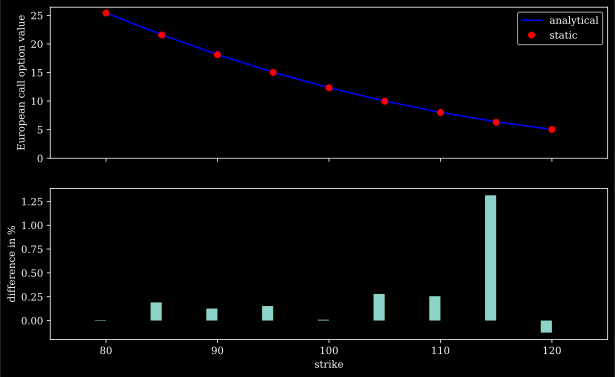

In [78]:
plt.figure(figsize=(12, 6))
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 6))
ax1.plot(k_list, anal_res, 'b', label='analytical')
ax1.plot(k_list, stat_res, 'ro', label='static')
ax1.set_ylabel('European call option value')
ax1.legend(loc=0)
ax1.set_ylim(bottom=0)
wi = 1.0
ax2.bar(k_list - wi / 2, (anal_res - stat_res) / anal_res * 100, wi)
ax2.set_xlabel('strike')
ax2.set_ylabel('difference in %')
ax2.set_xlim(left=75, right=125);

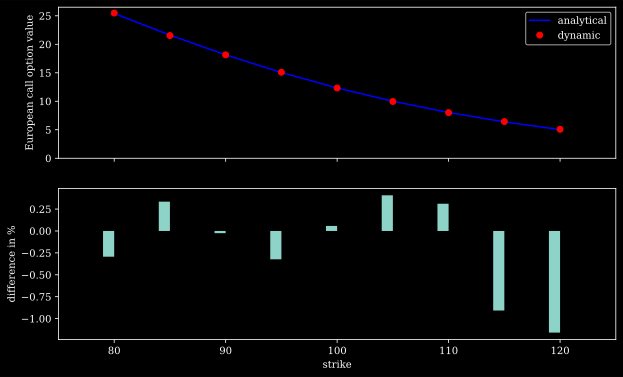

In [79]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 6))
ax1.plot(k_list, anal_res, 'b', label='analytical')
ax1.plot(k_list, dyna_res, 'ro', label='dynamic')
ax1.set_ylabel('European call option value')
ax1.legend(loc=0)
ax1.set_ylim(bottom=0)
wi = 1.0
ax2.bar(k_list - wi / 2, (anal_res - dyna_res) / anal_res * 100, wi)
ax2.set_xlabel('strike')
ax2.set_ylabel('difference in %')
ax2.set_xlim(left=75, right=125);

In [80]:
def gbm_mcs_amer(K, option='call'):
    ''' Valuation of American option in Black-Scholes-Merton
    by Monte Carlo simulation by LSM algorithm
    
    Parameters
    ==========
    K : float
        (positive) strike price of the option
    option : string
        type of the option to be valued ('call', 'put')
    
    Returns
    =======
    C0 : float
        estimated present value of European call option
    '''
    dt = T / M
    df = math.exp(-r * dt)
    # simulation of index levels
    S = np.zeros((M + 1, I))
    S[0] = S0
    sn = gen_sn(M, I)
    for t in range(1, M + 1):
        S[t] = S[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt 
                + sigma * math.sqrt(dt) * sn[t])
    # case based calculation of payoff
    if option == 'call':
        h = np.maximum(S - K, 0)
    else:
        h = np.maximum(K - S, 0)
    # LSM algorithm
    V = np.copy(h)
    for t in range(M - 1, 0, -1):
        reg = np.polyfit(S[t], V[t + 1] * df, 7)
        C = np.polyval(reg, S[t])
        V[t] = np.where(C > h[t], V[t + 1] * df, h[t])
    # MCS estimator
    C0 = df * np.mean(V[1])
    return C0

In [81]:
gbm_mcs_amer(110., option='call')

7.721705606305353

In [82]:
gbm_mcs_amer(110., option='put')

13.609997625418051

In [83]:
euro_res = []
amer_res = []

In [84]:
k_list = np.arange(80., 120.1, 5.)

In [85]:
for K in k_list:
    euro_res.append(gbm_mcs_dyna(K, 'put'))
    amer_res.append(gbm_mcs_amer(K, 'put'))

In [86]:
euro_res = np.array(euro_res)
amer_res = np.array(amer_res)

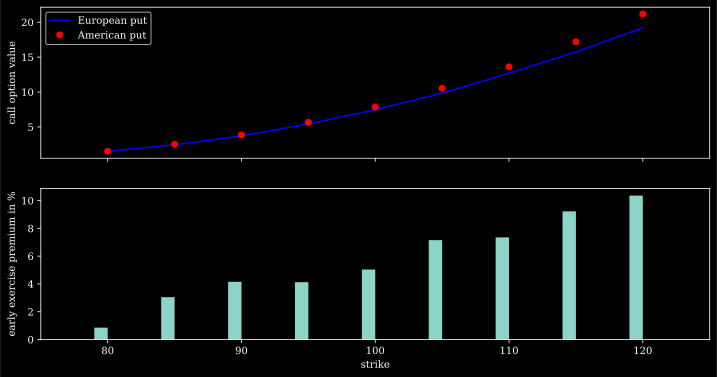

In [87]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12, 6))
ax1.plot(k_list, euro_res, 'b', label='European put')
ax1.plot(k_list, amer_res, 'ro', label='American put')
ax1.set_ylabel('call option value')
ax1.legend(loc=0)
wi = 1.0
ax2.bar(k_list - wi / 2, (amer_res - euro_res) / euro_res * 100, wi)
ax2.set_xlabel('strike')
ax2.set_ylabel('early exercise premium in %')
ax2.set_xlim(left=75, right=125);


Risk Measures
Value-at-Risk

In [88]:
S0 = 100
r = 0.05
sigma = 0.25
T = 30 / 365.
I = 10000

In [89]:
ST = S0 * np.exp((r - 0.5 * sigma ** 2) * T +
             sigma * np.sqrt(T) * npr.standard_normal(I))  

In [90]:
R_gbm = np.sort(ST - S0)

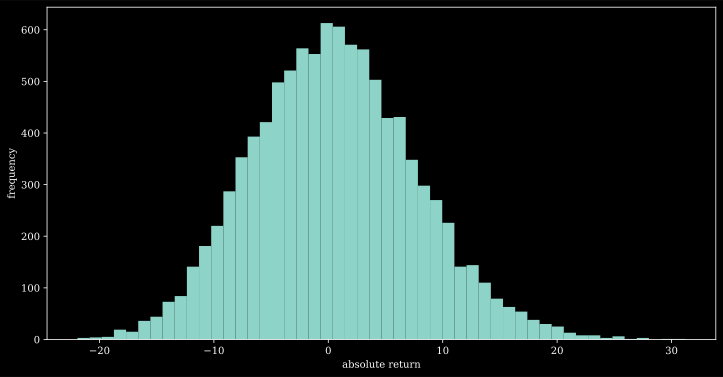

In [91]:
plt.figure(figsize=(12, 6))
plt.hist(R_gbm, bins=50)
plt.xlabel('absolute return')
plt.ylabel('frequency');

In [92]:
import warnings
warnings.simplefilter('ignore')

In [93]:
percs = [0.01, 0.1, 1., 2.5, 5.0, 10.0]
var = scs.scoreatpercentile(R_gbm, percs)
print('%16s %16s' % ('Confidence Level', 'Value-at-Risk'))
print(33 * '-')
for pair in zip(percs, var):
    print('%16.2f %16.3f' % (100 - pair[0], -pair[1]))

Confidence Level    Value-at-Risk
---------------------------------
           99.99           21.814
           99.90           18.837
           99.00           15.230
           97.50           12.816
           95.00           10.824
           90.00            8.504


In [94]:
dt = 30. / 365 / M
rj = lamb * (math.exp(mu + 0.5 * delta ** 2) - 1)

In [95]:
S = np.zeros((M + 1, I))
S[0] = S0
sn1 = npr.standard_normal((M + 1, I))
sn2 = npr.standard_normal((M + 1, I))
poi = npr.poisson(lamb * dt, (M + 1, I))
for t in range(1, M + 1, 1):
    S[t] = S[t - 1] * (np.exp((r - rj - 0.5 * sigma ** 2) * dt
                       + sigma * math.sqrt(dt) * sn1[t])
                       + (np.exp(mu + delta * sn2[t]) - 1)
                       * poi[t])
    S[t] = np.maximum(S[t], 0)

In [96]:
R_jd = np.sort(S[-1] - S0)

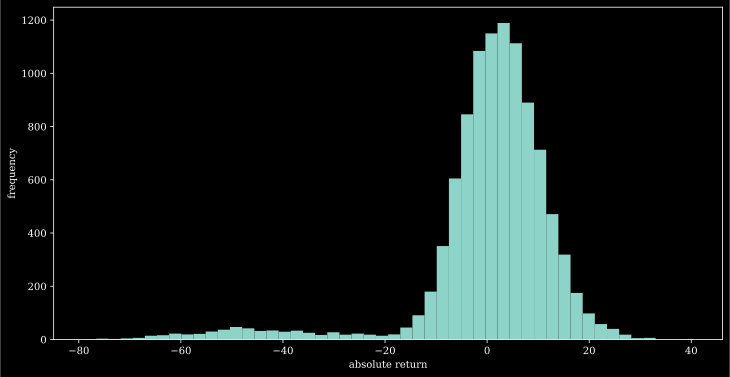

In [97]:
plt.figure(figsize=(12, 6))
plt.hist(R_jd, bins=50)
plt.xlabel('absolute return')
plt.ylabel('frequency');

In [98]:
percs = [0.01, 0.1, 1., 2.5, 5.0, 10.0]
var = scs.scoreatpercentile(R_jd, percs)
print('%16s %16s' % ('Confidence Level', 'Value-at-Risk'))
print(33 * '-')
for pair in zip(percs, var):
    print('%16.2f %16.3f' % (100 - pair[0], -pair[1]))

Confidence Level    Value-at-Risk
---------------------------------
           99.99           76.520
           99.90           69.396
           99.00           55.974
           97.50           46.405
           95.00           24.198
           90.00            8.836


In [99]:
percs = list(np.arange(0.0, 10.1, 0.1))
gbm_var = scs.scoreatpercentile(R_gbm, percs)
jd_var = scs.scoreatpercentile(R_jd, percs)

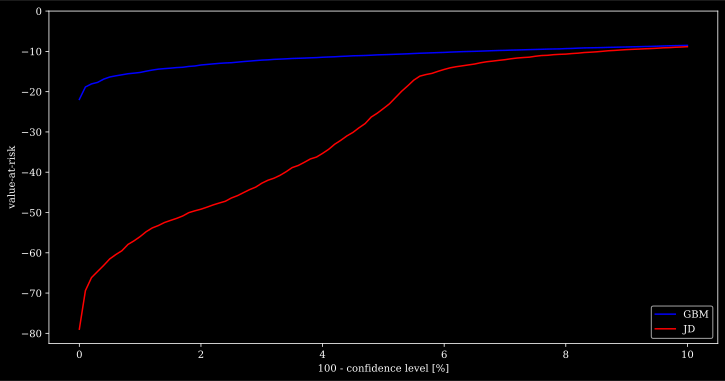

In [100]:
plt.figure(figsize=(12, 6))
plt.plot(percs, gbm_var, 'b', lw=1.5, label='GBM')
plt.plot(percs, jd_var, 'r', lw=1.5, label='JD')
plt.legend(loc=4)
plt.xlabel('100 - confidence level [%]')
plt.ylabel('value-at-risk')
plt.ylim(ymax=0.0);